In [2]:
import pandas as pd  
import numpy as np 
from sklearn.linear_model import LinearRegression
import os 
import sys
import gc
import itertools
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline


In [3]:
cab_data=pd.read_csv("cab_rides.csv")
weather_data=pd.read_csv("weather.csv")  

In [4]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [7]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [16]:
import datetime
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'])
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime,date_time
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901,1970-01-01 00:00:01.545003901
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,1970-01-01 00:00:01.543819974,1970-01-01 00:00:01.543819974
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974,1970-01-01 00:00:01.543819974
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974,1970-01-01 00:00:01.543819974
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974,1970-01-01 00:00:01.543819974


In [17]:
cab_data.shape

(693071, 11)

In [18]:
weather_data.shape

(6276, 10)

In [19]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [20]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [21]:
a=pd.concat([cab_data,weather_data])

In [22]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [23]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [24]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0


In [26]:
a.fillna(0,inplace=True)

In [27]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [28]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

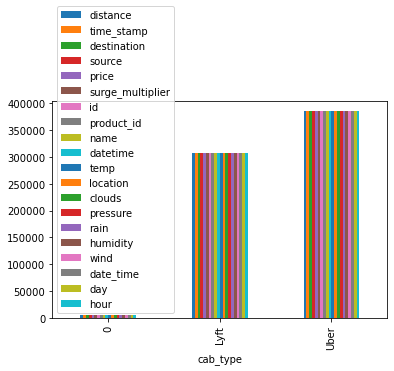

In [29]:
a.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

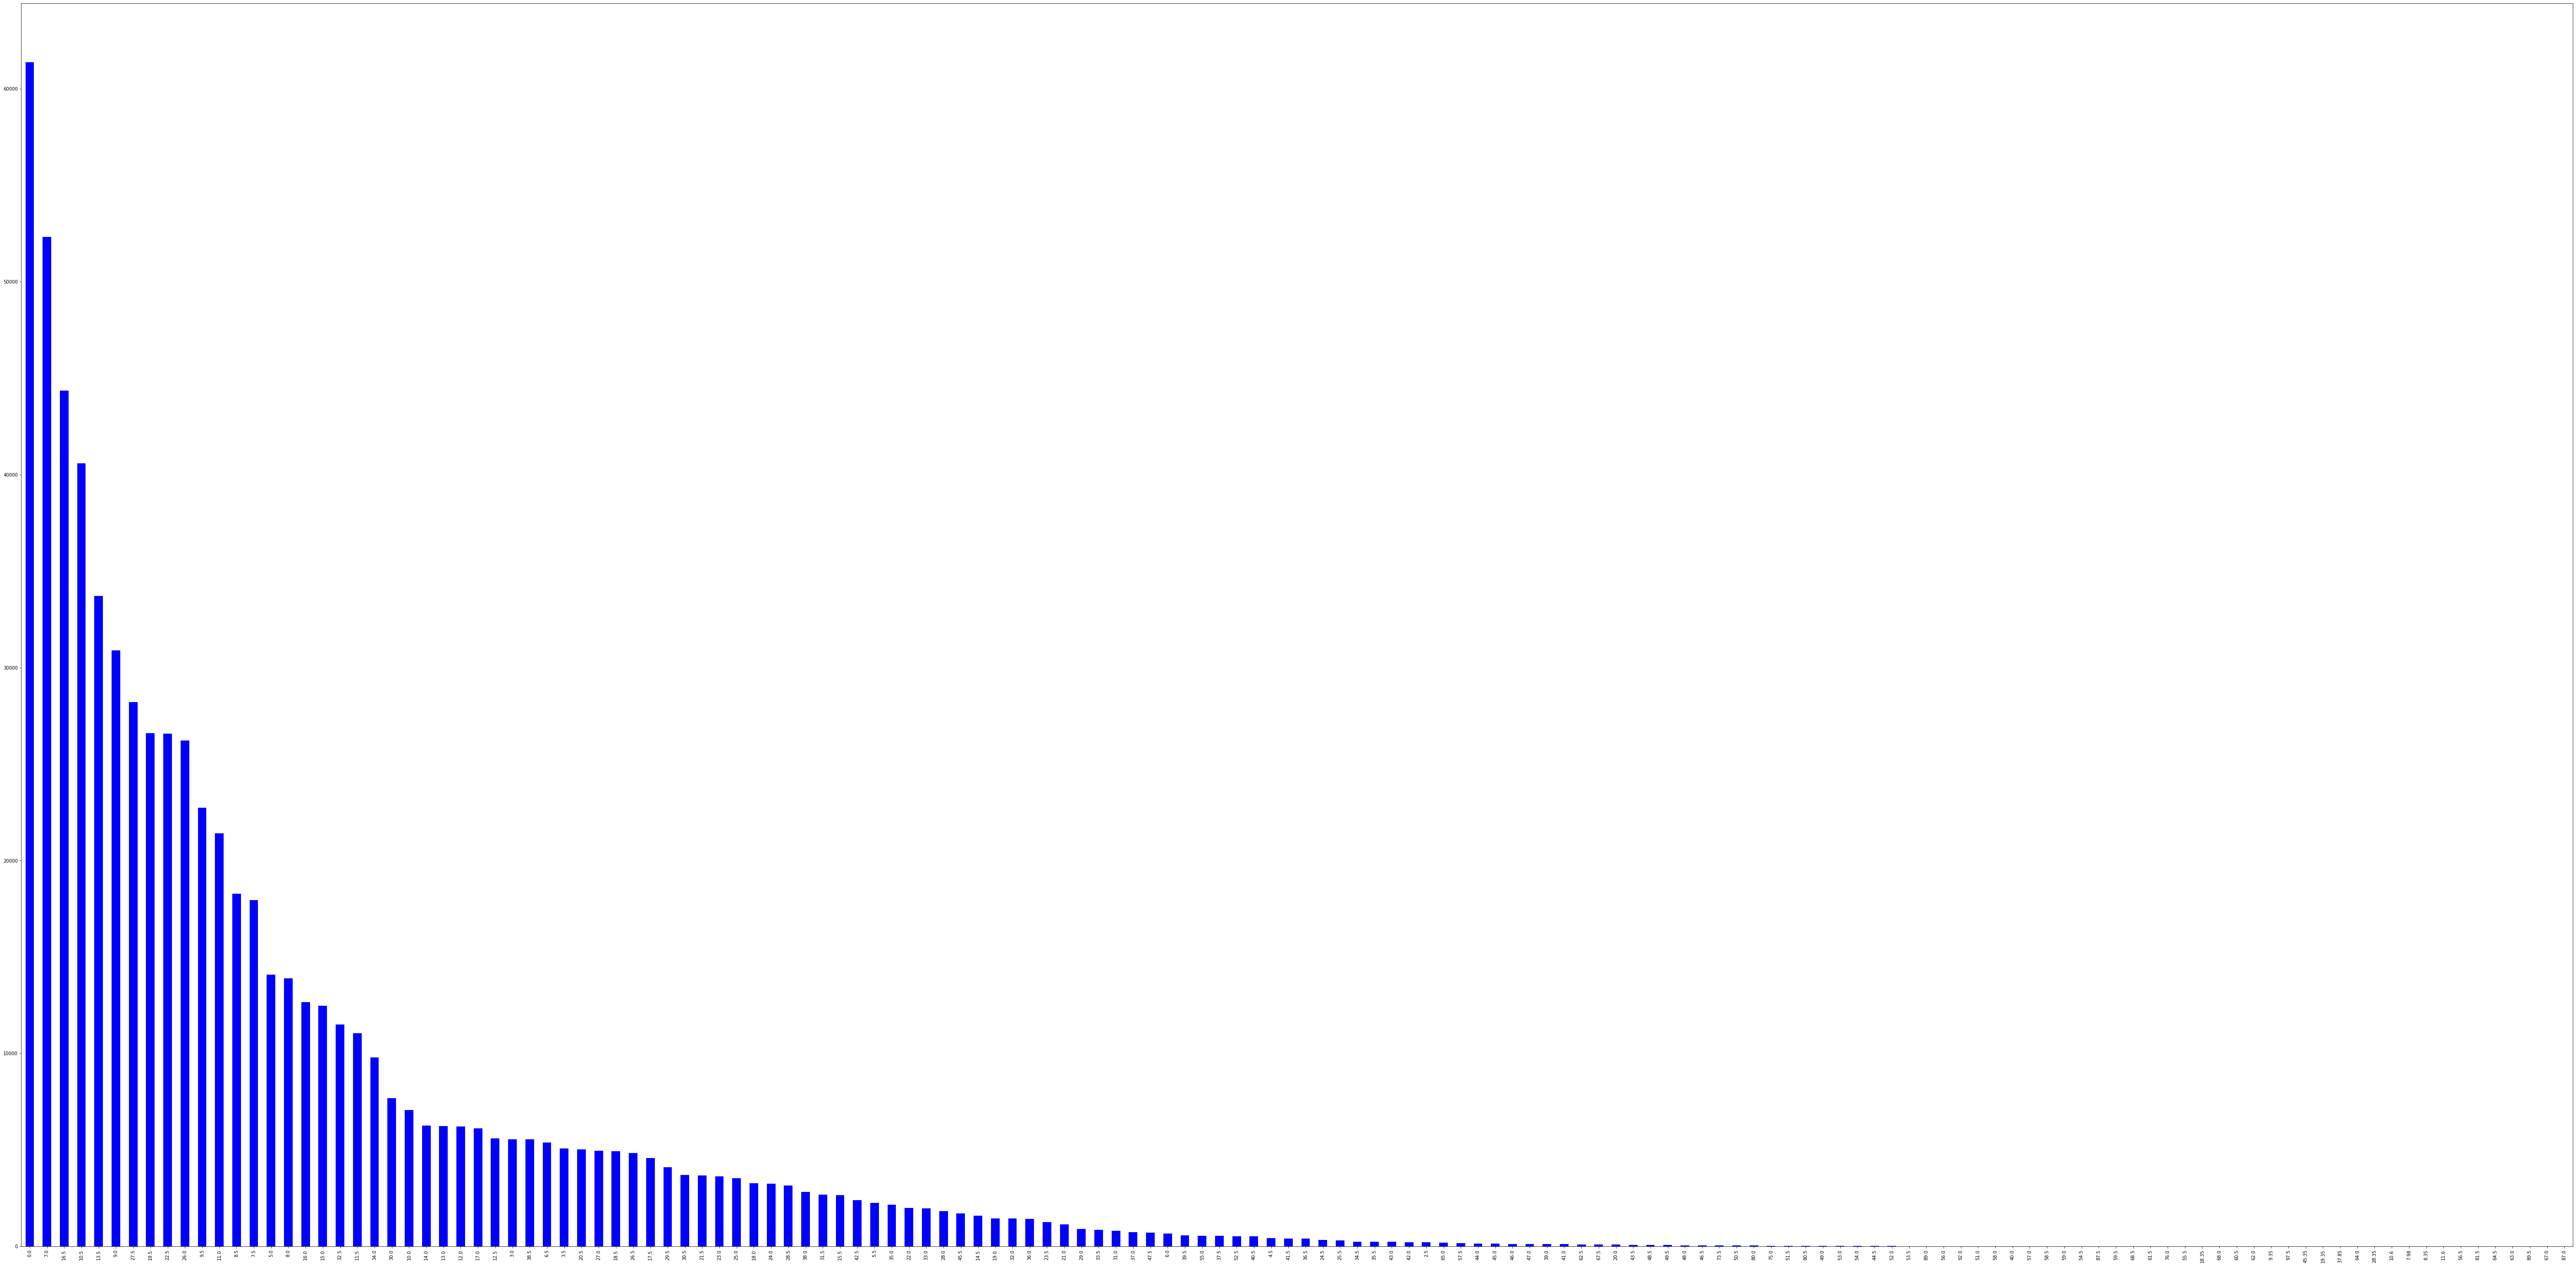

In [31]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

<AxesSubplot:>

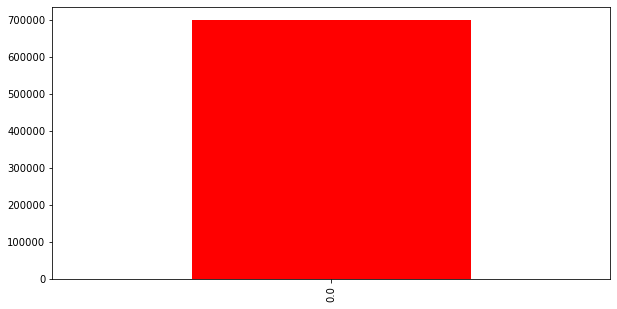

In [33]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='red')

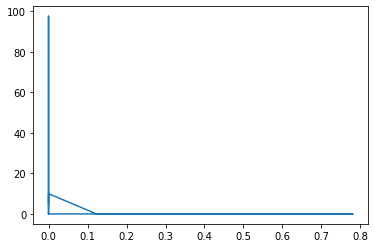

In [35]:
x=a['rain']
y=a['price']
pyplot.plot(x,y)
pyplot.show()

In [37]:
x1=a[['distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=a['price']


In [38]:
from sklearn.model_selection import train_test_split

x_train,y_train,x_test,y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)


In [39]:
linear=LinearRegression()
linear.fit(x_train,x_test)


LinearRegression()

In [40]:
prediction=linear.predict(y_train)

In [42]:
df=pd.DataFrame({'Actual':y_test,'Prediction':prediction})
df

,Actual,Prediction
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


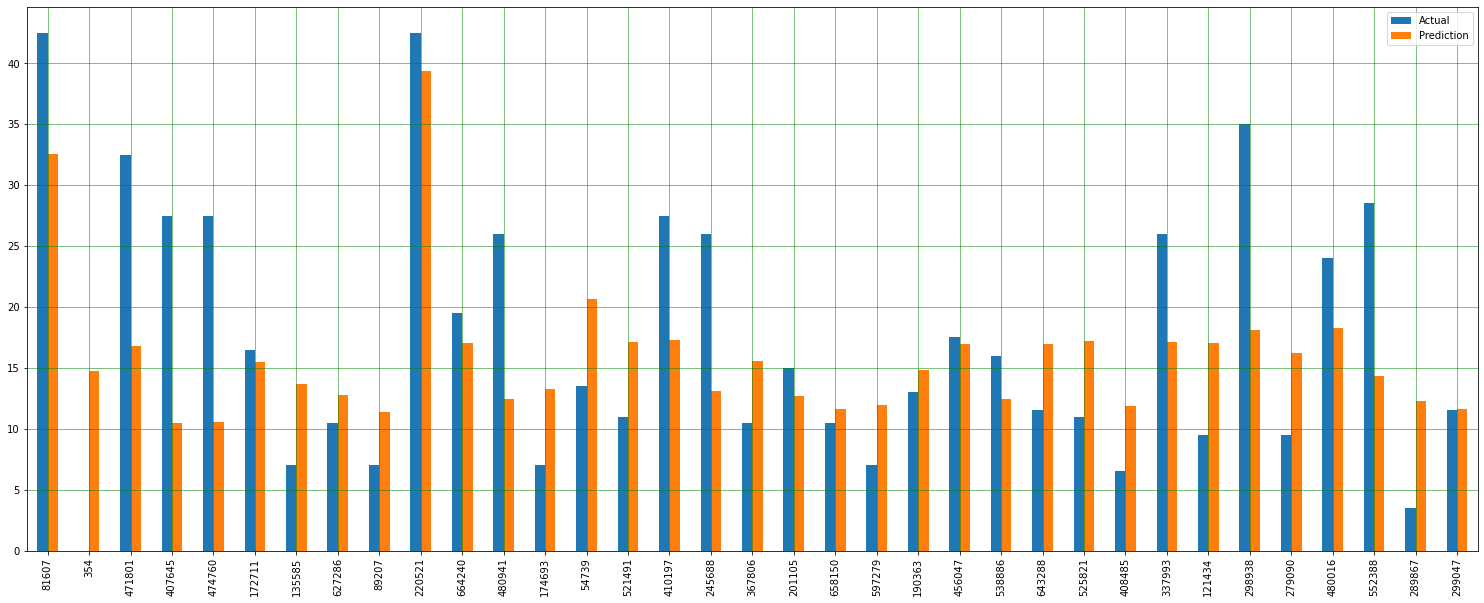

In [44]:
df1=df.head(35)
df1.plot(kind='bar',figsize=(26,10))
pyplot.grid(which='major',linestyle='-',linewidth='0.5',color='green')
pyplot.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
pyplot.show()
